In [1]:
#add libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels as sm
from scipy.stats import norm

#import CitiBike data
bikes = pd.read_csv('./assets/dataset/citibike_feb2014.csv')

In [2]:
#examine datatypes
bikes.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                  object
gender                       int64
dtype: object

In [3]:
#examine number samples
bikes.describe(include='all')

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
count,224736.000000,224736,224736,224736.000000,224736,224736.000000,224736.000000,224736.000000,224736,224736.000000,224736.000000,224736.000000,224736,224736,224736.000000
unique,NaN,204437,204781,NaN,329,NaN,NaN,NaN,329,NaN,NaN,NaN,2,78,NaN
top,NaN,2014-02-11 08:50:10,2014-02-25 08:47:55,NaN,Lafayette St & E 8 St,NaN,NaN,NaN,Lafayette St & E 8 St,NaN,NaN,NaN,Subscriber,1985,NaN
freq,NaN,7,6,NaN,2920,NaN,NaN,NaN,2622,NaN,NaN,NaN,218019,9305,NaN
mean,874.519810,NaN,NaN,439.203479,NaN,40.734366,-73.990386,440.741995,NaN,40.734221,-73.990521,18010.598222,NaN,NaN,1.154617
std,5486.092219,NaN,NaN,335.723861,NaN,0.019031,0.011853,341.497433,NaN,0.019048,0.011920,1987.769335,NaN,NaN,0.436592
min,60.000000,NaN,NaN,72.000000,NaN,40.680342,-74.017134,72.000000,NaN,40.680342,-74.017134,14529.000000,NaN,NaN,0.000000
25%,360.000000,NaN,NaN,305.000000,NaN,40.721854,-73.998522,305.000000,NaN,40.721816,-73.999061,16302.000000,NaN,NaN,1.000000
50%,544.000000,NaN,NaN,403.000000,NaN,40.736197,-73.990617,403.000000,NaN,40.735877,-73.990741,17975.000000,NaN,NaN,1.000000
75%,845.000000,NaN,NaN,490.000000,NaN,40.749156,-73.981918,488.000000,NaN,40.749013,-73.981948,19689.000000,NaN,NaN,1.000000


The data represents demographic and trip data for CitiBike trips for 18 days in February 2014.
Total samples: 224,736

In [4]:
#examine birth year 
bikes.groupby(['birth year']).size()

birth year
1899       9
1900      68
1901      11
1907       5
1910       4
1913       1
1917       3
1921       1
1922      32
1926       5
1927       2
1932       8
1933      10
1934      21
1935      14
1936      31
1937      24
1938      75
1939      43
1940      84
1941     164
1942     182
1943     130
1944     311
1945     214
1946     454
1947     451
1948     807
1949     725
1950     890
        ... 
1969    5455
1970    5736
1971    4923
1972    5028
1973    4974
1974    5848
1975    4884
1976    5579
1977    5957
1978    6876
1979    7771
1980    7661
1981    8208
1982    7968
1983    8779
1984    9139
1985    9305
1986    8109
1987    7472
1988    8048
1989    6843
1990    5697
1991    3074
1992    2168
1993    1687
1994    1215
1995     827
1996     334
1997     251
\N      6717
Length: 78, dtype: int64

In [5]:
bikes.sort_values(by='birth year').tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
20792,1897,2014-02-02 15:30:00,2014-02-02 16:01:37,398,Atlantic Ave & Furman St,40.691652,-73.999979,398,Atlantic Ave & Furman St,40.691652,-73.999979,16927,Customer,\N,0
150054,1748,2014-02-22 17:54:19,2014-02-22 18:23:27,2006,Central Park S & 6 Ave,40.765909,-73.976342,2022,E 59 St & Sutton Pl,40.758491,-73.959206,18647,Customer,\N,0
125890,1240,2014-02-20 15:38:26,2014-02-20 15:59:06,529,W 42 St & 8 Ave,40.757570,-73.990985,423,W 54 St & 9 Ave,40.765849,-73.986905,21386,Customer,\N,0
20757,786,2014-02-02 15:28:31,2014-02-02 15:41:37,444,Broadway & W 24 St,40.742354,-73.989151,449,W 52 St & 9 Ave,40.764618,-73.987895,14765,Customer,\N,0
161082,1740,2014-02-23 16:02:39,2014-02-23 16:31:39,310,State St & Smith St,40.689269,-73.989129,303,Mercer St & Spring St,40.723627,-73.999496,17038,Customer,\N,0


In [6]:
#conversion of data types
#usertype: Customer = 0, Subscriber = 1
#gender: 0 as unknown = NaN, 1 as male = 1, 2 as female = 0
#birthyear to numeric
#tripduration to minutes
bikes[['starttime','stoptime']] = bikes[['starttime','stoptime']].apply(pd.to_datetime)
bikes['usertype'] = bikes['usertype'].map({'Customer': 0, 'Subscriber': 1})
bikes['gender'] = bikes['gender'].map({0: None,1:1,2:2})
bikes['gender'] = bikes['gender'].map({1:1,2:0})
bikes['birth year'] = bikes['birth year'].apply(pd.to_numeric, errors='coerce')
bikes['tripduration'] = bikes['tripduration'] / 60

In [7]:
#examine missing values
bikes.describe(include='all')

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
count,224736.000000,224736,224736,224736.000000,224736,224736.000000,224736.000000,224736.000000,224736,224736.000000,224736.000000,224736.000000,224736.000000,218019.000000,218005.000000
unique,NaN,204437,204781,NaN,329,NaN,NaN,NaN,329,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2014-02-11 08:50:10,2014-02-25 08:47:55,NaN,Lafayette St & E 8 St,NaN,NaN,NaN,Lafayette St & E 8 St,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7,6,NaN,2920,NaN,NaN,NaN,2622,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2014-02-01 00:00:00,2014-02-01 00:04:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2014-02-28 23:59:47,2014-03-02 13:51:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,14.575330,NaN,NaN,439.203479,NaN,40.734366,-73.990386,440.741995,NaN,40.734221,-73.990521,18010.598222,0.970112,1975.497507,0.809734
std,91.434870,NaN,NaN,335.723861,NaN,0.019031,0.011853,341.497433,NaN,0.019048,0.011920,1987.769335,0.170280,11.423985,0.392512
min,1.000000,NaN,NaN,72.000000,NaN,40.680342,-74.017134,72.000000,NaN,40.680342,-74.017134,14529.000000,0.000000,1899.000000,0.000000
25%,6.000000,NaN,NaN,305.000000,NaN,40.721854,-73.998522,305.000000,NaN,40.721816,-73.999061,16302.000000,1.000000,1968.000000,1.000000


## Missing Values
birth year: 6717

gender: 6731

In [8]:
#examine overlap of null values
bikes[bikes['gender'].isnull()].groupby(['birth year']).size()

birth year
1951.0    6
1991.0    8
dtype: int64

There are 14 more null values in 'gender' than in 'birth year'. All 14 values are accounted for, meaning that all records with null 'birth year' are also null 'gender'.

C:\Users\ittrain\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\ittrain\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


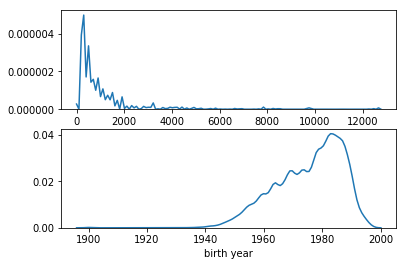

In [68]:
plt.subplot(2, 1, 1)
sns.distplot(bikes['tripduration'],hist=False);
plt.subplot(2, 1, 2)
sns.distplot(bikes['birth year'],hist=False);

Distribution of 'tripduration' in minutes (top) and 'birth year' (bottom).

In [10]:
print("tripduration has kurtosis {:.2f} and skew {:.2f}. tripduration is very strongly peaked and very strongly skewed with a very long right tail.".format(bikes['tripduration'].kurt(),bikes['tripduration'].skew()))
print("birth year has kurtosis {:.2f} and skew {:.2f}. birth year is similarly kurtic to the normal distribution and moderately skewed left.".format(bikes['birth year'].kurt(),bikes['birth year'].skew()))

tripduration has kurtosis 5561.43 and skew 62.91. tripduration is very strongly peaked and very strongly skewed with a very long right tail.
birth year has kurtosis 0.44 and skew -0.71. birth year is similarly kurtic to the normal distribution and moderately skewed left.


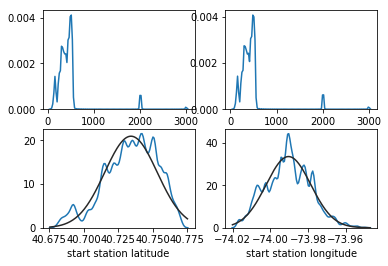

In [64]:
plt.subplot(2,2,1)
sns.distplot(bikes['start station id'],hist=False);
plt.subplot(2,2,2)
sns.distplot(bikes['end station id'],hist=False);
plt.subplot(2,2,3)
sns.distplot(bikes['start station latitude'],hist=False, fit=norm);
plt.subplot(2,2,4)
sns.distplot(bikes['start station longitude'],hist=False, fit=norm);

In [60]:
sns.distplot?

Distribution of 'start station id' and 'end station id' (unique numerical identifier, top) and 'start station latitude' and 'start station longitude' (in degrees, bottom). Station IDs appear to have outliers around 2000 and 3000.

In [69]:
print("start station latitude has kurtosis {:.2f} and skew {:.2f}. start station latitude has low kurtosis and is approximately symmetric.".format(bikes['start station latitude'].kurt(),bikes['start station latitude'].skew()))
print("start station longitude has kurtosis {:.2f} and skew {:.2f}. start station longitude has low kurtosis and is approximately symmetric.".format(bikes['start station longitude'].kurt(),bikes['start station longitude'].skew()))

start station latitude has kurtosis -0.18 and skew -0.49. start station latitude has low kurtosis and is approximately symmetric.
start station longitude has kurtosis -0.21 and skew 0.15. start station longitude has low kurtosis and is approximately symmetric.


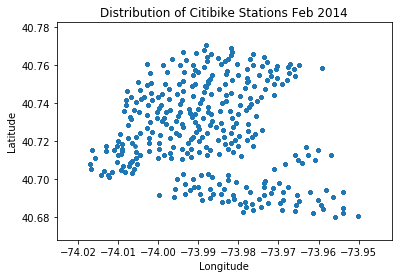

In [73]:
plt.scatter(bikes['start station longitude'], bikes['start station latitude'], marker='.');
plt.title('Distribution of Citibike Stations Feb 2014');
plt.xlabel('Longitude');
plt.ylabel('Latitude');

Distribution of Citibike stations reflects the approximate shape of Manhattan below Central Park, along with Williamsburg.

In [13]:
#examine outlying station IDs; confirmed actual IDs through data origin
bikes[bikes['start station id'] > 1000].groupby(['start station id']).size()

start station id
2000     339
2001      75
2002     222
2003    1093
2004     580
2005      36
2006     429
2008     407
2009     439
2010     560
2012     706
2017     359
2021     720
2022     427
2023     330
3002     781
dtype: int64

In [16]:
print('{:.0f}% of trips are by subscribers.'.format(bikes['usertype'].mean()*100))
print('{:.0f}% of trips by users with known gender are by males.'.format(bikes['gender'].mean()*100))

97% of trips are by subscribers.
81% of trips by users with known gender are by males.


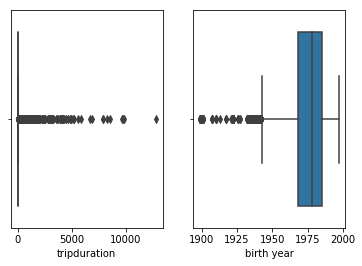

In [76]:
#box plots
plt.subplot(1, 2, 1)
sns.boxplot(bikes['tripduration']);
plt.subplot(1, 2, 2)
sns.boxplot(bikes['birth year']);


tripduration is extremely kurtic with a very small inter-quartile range, so there are many outliers. birth year has low kurtosis and is only moderately skewed.

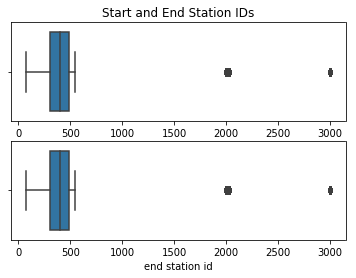

In [78]:
plt.subplot(2,1,1)
plt.title('Start and End Station IDs')
sns.boxplot(bikes['start station id']);
plt.subplot(2,1,2)
sns.boxplot(bikes['end station id']);


In [18]:
#trips greater than 2 hours
bikes[bikes['tripduration'] > 120].groupby(['usertype']).size()

usertype
0     97
1    851
dtype: int64

In [19]:
#trips greater than 24 hours
bikes[bikes['tripduration'] > 1440].groupby(['usertype']).size()

usertype
0      5
1    110
dtype: int64

In [20]:
corr_mat = bikes.corr()
corr_mat

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,usertype,birth year,gender
tripduration,1.000000,0.005524,-0.008172,0.001056,0.005414,-0.004019,0.001424,-0.001587,-0.027808,-0.009187,-0.012698
start station id,0.005524,1.000000,0.099135,0.080111,0.050304,0.078906,0.022091,-0.002787,-0.007594,-0.006265,0.005428
start station latitude,-0.008172,0.099135,1.000000,0.159103,0.068288,0.729414,0.084252,0.001326,0.011633,-0.064750,0.067316
start station longitude,0.001056,0.080111,0.159103,1.000000,0.012494,0.093133,0.486981,-0.001717,0.019322,0.038516,0.014827
end station id,0.005414,0.050304,0.068288,0.012494,1.000000,0.093363,0.073808,-0.001796,-0.021559,-0.015825,0.004837
end station latitude,-0.004019,0.078906,0.729414,0.093133,0.093363,1.000000,0.159742,0.000991,0.013876,-0.066701,0.064479
end station longitude,0.001424,0.022091,0.084252,0.486981,0.073808,0.159742,1.000000,-0.001569,0.017955,0.037440,0.016422
bikeid,-0.001587,-0.002787,0.001326,-0.001717,-0.001796,0.000991,-0.001569,1.000000,-0.000671,-0.003679,0.001899
usertype,-0.027808,-0.007594,0.011633,0.019322,-0.021559,0.013876,0.017955,-0.000671,1.000000,NaN,NaN
birth year,-0.009187,-0.006265,-0.064750,0.038516,-0.015825,-0.066701,0.037440,-0.003679,NaN,1.000000,-0.043002


Text(0.5,1,'Heat Map of Correlation Matrix')

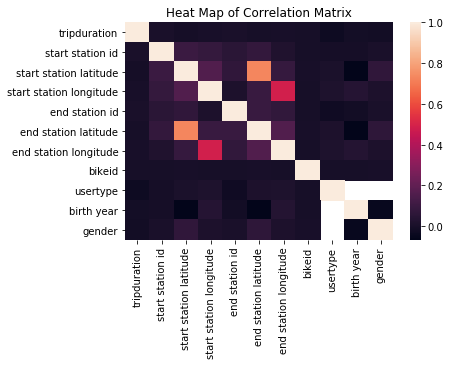

In [80]:
#Mostly very low correlations. Higher correlations between start/end latitude and longitude, especially for latitude. Hypothesis is that us
sns.heatmap(corr_mat);
plt.title('Heat Map of Correlation Matrix')

Mostly very low correlations. Higher correlations between start/end latitude and longitude, especially for latitude. Hypothesis is that users are more likely to take CitiBike for cross-town trips because north-south trips are facilitated by subway. Williamsburg is also largely separated from Manhattan based on latitude; it overlaps in longitude with much of Manhattan but is not easily accessible from those areas because of the East River and few bridges.

In [22]:
#Non-subscriber customers do not share gender or birth year
bikes[bikes['usertype'] == 0].groupby(['gender']).size()

Series([], dtype: int64)

birth year and gender are missing for trips by non-subscriber customers.

In [81]:
bikes[bikes['birth year'] < 1943].groupby(['birth year']).size()

birth year
1899.0      9
1900.0     68
1901.0     11
1907.0      5
1910.0      4
1913.0      1
1917.0      3
1921.0      1
1922.0     32
1926.0      5
1927.0      2
1932.0      8
1933.0     10
1934.0     21
1935.0     14
1936.0     31
1937.0     24
1938.0     75
1939.0     43
1940.0     84
1941.0    164
1942.0    182
dtype: int64

## Issues and Limitations
The data only comes from an 18-day period in February 2014. A small percentage of trips extend beyond 2 hours and 24 hours, which likely do not represent actual trip lengths. Station ID numbers do not appear to be in a specific order geographically, so a 500 does not give meaningful numerical information compared to a 400. The vast majority of rides are by subscribers, and customers do not give birth year or gender information. Birth year appears to have some false data, particularly for birth years prior to 1930 (and especially larger numbers at 1922 and 1900). 

In [26]:
#fill NAs with median
bikesNA = bikes
bikesNA = bikesNA.fillna(bikesNA.median())

In [27]:
bikesNA.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,usertype,birth year,gender
count,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000
mean,14.575330,439.203479,40.734366,-73.990386,440.741995,40.734221,-73.990521,18010.598222,0.970112,1975.572303,0.815432
std,91.434870,335.723861,0.019031,0.011853,341.497433,0.019048,0.011920,1987.769335,0.170280,11.260033,0.387947
min,1.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,0.000000,1899.000000,0.000000
25%,6.000000,305.000000,40.721854,-73.998522,305.000000,40.721816,-73.999061,16302.000000,1.000000,1968.000000,1.000000
50%,9.066667,403.000000,40.736197,-73.990617,403.000000,40.735877,-73.990741,17975.000000,1.000000,1978.000000,1.000000
75%,14.083333,490.000000,40.749156,-73.981918,488.000000,40.749013,-73.981948,19689.000000,1.000000,1984.000000,1.000000
max,12768.466667,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21542.000000,1.000000,1997.000000,1.000000


In [28]:
#fill NAs using interpolate
import scipy as sp
bikesNA2 = bikes
bikesNA2 = bikesNA2.interpolate()

In [29]:
bikesNA2.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,usertype,birth year,gender
count,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000
mean,14.575330,439.203479,40.734366,-73.990386,440.741995,40.734221,-73.990521,18010.598222,0.970112,1975.510250,0.808451
std,91.434870,335.723861,0.019031,0.011853,341.497433,0.019048,0.011920,1987.769335,0.170280,11.343306,0.390220
min,1.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,0.000000,1899.000000,0.000000
25%,6.000000,305.000000,40.721854,-73.998522,305.000000,40.721816,-73.999061,16302.000000,1.000000,1968.000000,1.000000
50%,9.066667,403.000000,40.736197,-73.990617,403.000000,40.735877,-73.990741,17975.000000,1.000000,1978.000000,1.000000
75%,14.083333,490.000000,40.749156,-73.981918,488.000000,40.749013,-73.981948,19689.000000,1.000000,1984.000000,1.000000
max,12768.466667,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21542.000000,1.000000,1997.000000,1.000000


In [30]:
#transform using log
lntrip = np.log(bikes['tripduration'])

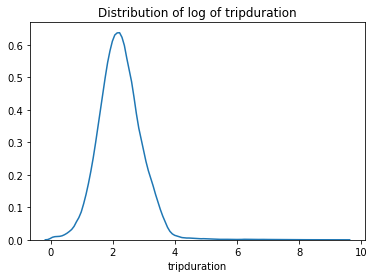

In [83]:
sns.distplot(lntrip,hist=False);
plt.title('Distribution of log of tripduration');

In [32]:
lntrip.skew()

0.8276856289009378

In [33]:
lntrip.kurt()

4.752355351443198

In [34]:
bikesNA2['lntrip'] = lntrip

In [35]:
bikesNA2 = bikesNA2.rename(index=str, columns = {'end station latitude':'EndLat','start station latitude':'StartLat','start station longitude':'StartLong','birth year':'BirthYear'})

In [36]:
bikesNA2 = bikesNA2.rename(index=str, columns = {'end station longitude':'EndLong'})

In [84]:
#sample and model
bikes_sample = bikesNA2.sample(frac=.8)

In [85]:
from statsmodels.formula.api import ols
bikes_model = smf.ols(formula = 'EndLat ~ StartLat + StartLong + EndLong + lntrip + BirthYear', data = bikes_sample).fit()
bikes_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EndLat   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                 4.354e+04
Date:                Wed, 04 Apr 2018   Prob (F-statistic):               0.00
Time:                        22:53:00   Log-Likelihood:             5.2829e+05
No. Observations:              179789   AIC:                        -1.057e+06
Df Residuals:                  179783   BIC:                        -1.057e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.1612      0.240     71.604      0.000      16.691      17.631
StartLat       0.7302      0.002    452.890      0.000       0.727       0.733
StartLong     -0.1496      0.003    -50.785      0.000      -0.155      -0.144
EndLong        0.2321      0.003     79.979      0.000       0.226       0.238
lntrip     -6.348e-05   4.32e-05     -1.468      0.142      -0.000    2.13e-05
BirthYear   -3.64e-05   2.68e-06    -13.602      0.000   -4.16e-05   -3.12e-05
==============================================================================
Omnibus:                     8548.399   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26181.382
Skew:                          -0.187   Prob(JB):                         0.00
Kurtosis:                       4.832   Cond. No.                     1.57e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
bikes_sample2 = bikesNA2.sample(frac=.8)
predictions = bikes_model.predict(bikes_sample2)

In [89]:
residuals = predictions - bikes_sample2['EndLat']

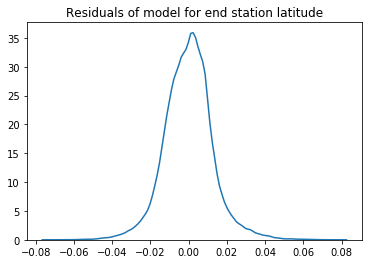

In [91]:
sns.distplot(residuals,hist=False);
plt.title('Residuals of model for end station latitude');